<a href="https://colab.research.google.com/github/kheirie/cats-vs-dogs/blob/main/cats_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os 
import zipfile 

local_zip = "data.zip"

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [5]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
train_path = "/tmp/data/training_set/training_set"
test_path = "/tmp/data/test_set/test_set"

cats_train = os.listdir(train_path + "/cats")
dogs_train = os.listdir(train_path + "/dogs")
cats_test = os.listdir(test_path + "/cats")
dogs_test=os.listdir(test_path + "/dogs")

print(len(cats_test))
print(len(cats_train))
print(len(dogs_test))
print(len(dogs_train))

1012
4001
1013
4006


In [9]:
# remove _DS_Store_ files
for i in cats_train: 
  if i == "_DS_Store":
    cats_train.pop(cats_train.index(i))

for i in cats_test: 
  if i == "_DS_Store":
    cats_test.pop(cats_test.index(i))

for i in dogs_train: 
  if i == "_DS_Store":
    dogs_train.pop(dogs_train.index(i))
    
for i in dogs_test: 
  if i == "_DS_Store":
    dogs_test.pop(dogs_test.index(i))


342


In [10]:
print(len(cats_test))
print(len(cats_train))
print(len(dogs_test))
print(len(dogs_train))

1011
4000
1012
4005


In [11]:
# create train and test datasets 

train_labels = []
train_path_ = []

for i in cats_train: 
  train_labels.append(1)
  train_path_.append(train_path + "/cats/")

for i in dogs_train: 
  train_labels.append(0)
  train_path_.append(train_path + "/dogs/")


test_labels = []
test_path_ = []

for i in cats_test: 
  test_labels.append(1)
  test_path_.append(test_path + "/cats/")

for i in dogs_test: 
  test_labels.append(0)
  test_path_.append(test_path + "/dogs/")

train_imgs = cats_train + dogs_train

test_imgs = cats_test + dogs_test 

train_dic = {'path': train_path_, 'images': train_imgs, 'labels': train_labels}
test_dic = {'path': test_path_, 'images': test_imgs, 'labels': test_labels}

train = pd.DataFrame(train_dic)
test = pd.DataFrame(test_dic)

In [12]:
train.head()

,path,images,labels
0,/tmp/data/training_set/training_set/cats/,cat.1375.jpg,1
1,/tmp/data/training_set/training_set/cats/,cat.3540.jpg,1
2,/tmp/data/training_set/training_set/cats/,cat.3486.jpg,1
3,/tmp/data/training_set/training_set/cats/,cat.3906.jpg,1
4,/tmp/data/training_set/training_set/cats/,cat.2997.jpg,1


In [13]:
test.head()

,path,images,labels
0,/tmp/data/test_set/test_set/cats/,cat.4750.jpg,1
1,/tmp/data/test_set/test_set/cats/,cat.4055.jpg,1
2,/tmp/data/test_set/test_set/cats/,cat.4278.jpg,1
3,/tmp/data/test_set/test_set/cats/,cat.4554.jpg,1
4,/tmp/data/test_set/test_set/cats/,cat.4574.jpg,1


In [14]:
train = shuffle(train, random_state=42).reset_index(drop=True)
train.head()

,path,images,labels
0,/tmp/data/training_set/training_set/dogs/,dog.2671.jpg,0
1,/tmp/data/training_set/training_set/dogs/,dog.1273.jpg,0
2,/tmp/data/training_set/training_set/dogs/,dog.1486.jpg,0
3,/tmp/data/training_set/training_set/cats/,cat.2709.jpg,1
4,/tmp/data/training_set/training_set/dogs/,dog.1400.jpg,0


In [15]:
test = shuffle(test, random_state=42).reset_index(drop=True)
test.head()

,path,images,labels
0,/tmp/data/test_set/test_set/cats/,cat.4214.jpg,1
1,/tmp/data/test_set/test_set/cats/,cat.4159.jpg,1
2,/tmp/data/test_set/test_set/cats/,cat.4991.jpg,1
3,/tmp/data/test_set/test_set/cats/,cat.4579.jpg,1
4,/tmp/data/test_set/test_set/cats/,cat.4224.jpg,1


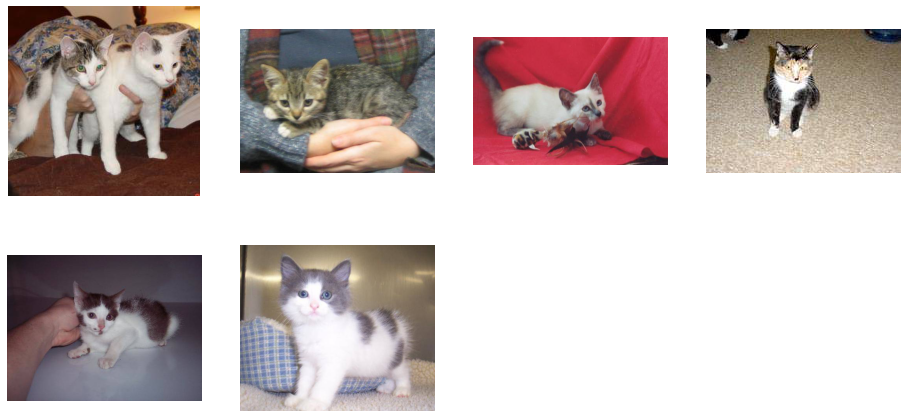

In [30]:
def show_image(path, image_list, number_of_images):
    nrows=4
    ncols=4
    fig = plt.gcf()
    fig.set_size_inches(ncols*4, nrows*4)
    

    for i in range(number_of_images):
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off')
        img = mpimg.imread(path + "/" + image_list[i])
        plt.imshow(img)

show_image(train_path + "/cats", cats_train, 6)

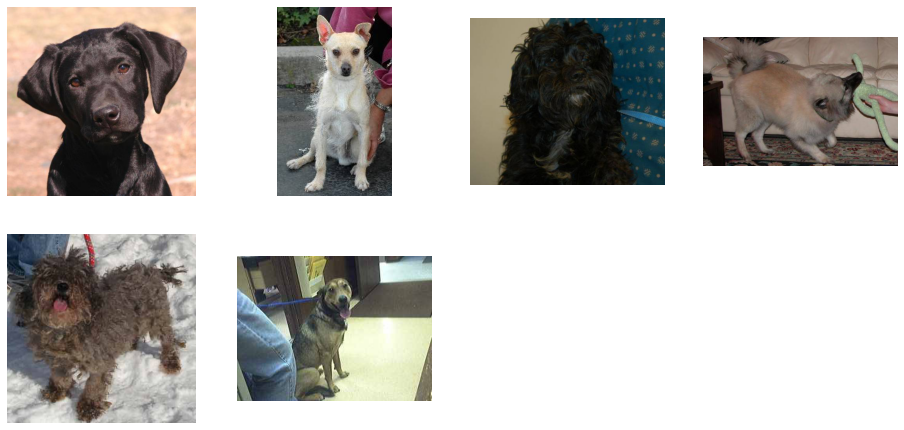

In [31]:
show_image(train_path + "/dogs", dogs_train, 6)

In [18]:
training_images = []
testing_images = []

for i in range(len(train)):
    training_images.append(load_img(os.path.join(train.path[i], train.images[i]), target_size=(150, 150)))

for i in range(len(test)): 
    testing_images.append(load_img(os.path.join(test.path[i], test.images[i]), target_size=(150, 150)))


In [19]:
training_images = np.array([img_to_array(img) for img in training_images])/255
testing_images = np.array([img_to_array(img) for img in testing_images])/255

In [20]:
train_targets = np.array(train.labels.tolist())
test_targets = np.array(test.labels.tolist())

In [21]:
aug=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73984)            

In [28]:
history=model.fit(aug.flow(training_images, train_targets, batch_size=128),        
                  steps_per_epoch=len(training_images)//128,
                  epochs=100,
                  validation_data=(testing_images, test_targets), 
                  verbose=1)

Epoch 1/100
62/62 [==============================] - 40s 638ms/step - loss: 1.3236 - accuracy: 0.5335 - val_loss: 0.6720 - val_accuracy: 0.5774
Epoch 2/100
62/62 [==============================] - 39s 633ms/step - loss: 0.6730 - accuracy: 0.5748 - val_loss: 0.6326 - val_accuracy: 0.6342
Epoch 3/100
62/62 [==============================] - 39s 629ms/step - loss: 0.6335 - accuracy: 0.6389 - val_loss: 0.5799 - val_accuracy: 0.6975
Epoch 4/100
62/62 [==============================] - 39s 632ms/step - loss: 0.6111 - accuracy: 0.6563 - val_loss: 0.6082 - val_accuracy: 0.6530
Epoch 5/100
62/62 [==============================] - 39s 624ms/step - loss: 0.5993 - accuracy: 0.6679 - val_loss: 0.5376 - val_accuracy: 0.7355
Epoch 6/100
62/62 [==============================] - 39s 624ms/step - loss: 0.5644 - accuracy: 0.7009 - val_loss: 0.5975 - val_accuracy: 0.6757
Epoch 7/100
62/62 [==============================] - 39s 622ms/step - loss: 0.5641 - accuracy: 0.7054 - val_loss: 0.5240 - val_accuracy:

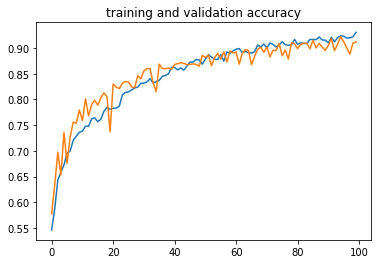

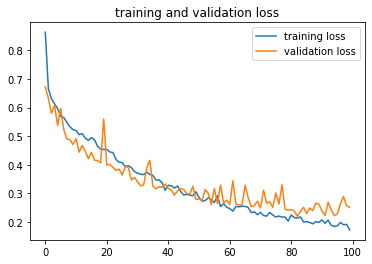

In [29]:
# plot accuracy and loss 

acc=history.history["accuracy"]
loss=history.history["loss"]

val_acc=history.history["val_accuracy"]
val_loss=history.history["val_loss"]

epochs = range(len(acc))

plt.figure()

plt.plot(epochs, acc, label="training accuracy")
plt.plot(epochs, val_acc, label="validation accuracy")
plt.title("training and validation accuracy")

plt.figure()

plt.plot(epochs, loss, label="training loss")
plt.plot(epochs, val_loss, label="validation loss")
plt.title("training and validation loss")

plt.legend()
plt.show()
